In [1]:
import pandas as pd;
import numpy as np;
import seaborn as sns;
import matplotlib.pyplot as plt;
%matplotlib inline

In [2]:
df = pd.read_csv('./TensorFlow_FILES/DATA/kc_house_data.csv');
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Dataset link: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

## Exploratory Data Analysis (EDA)

<Axes: >

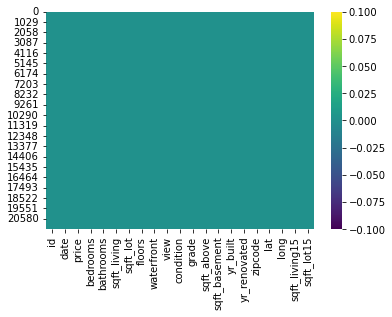

In [3]:
# visualize missing data
sns.heatmap(df.isnull(), cmap = 'viridis')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


C:\Users\Shahbaz\AppData\Local\Temp\ipykernel_75608\1118507513.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


Text(0.5, 1.0, 'Price Distribution plot')

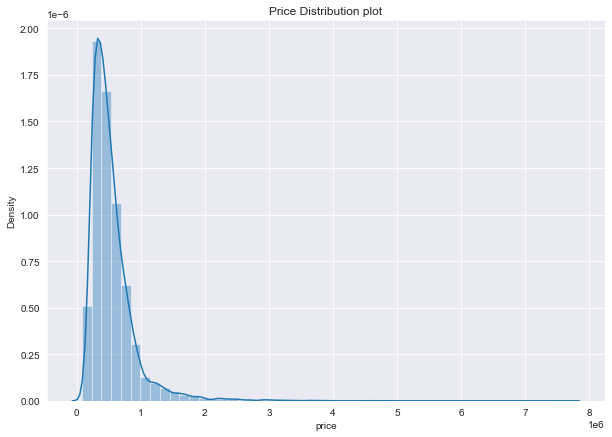

In [6]:
sns.set_style('darkgrid')
plt.figure(figsize = (10, 7))
sns.distplot(df['price'])
plt.title('Price Distribution plot')

Text(0, 0.5, 'Houses with that number of bedrooms')

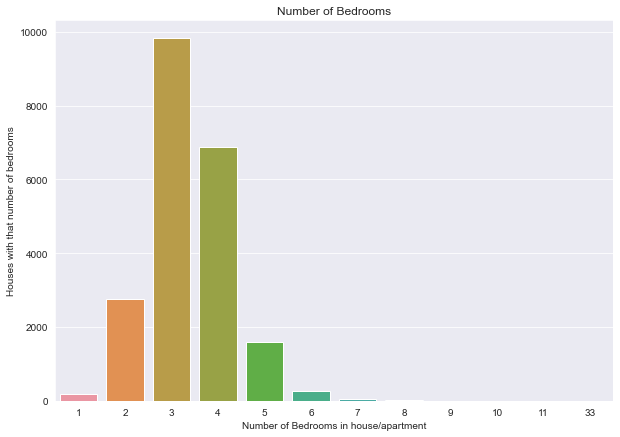

In [7]:
plt.figure(figsize = (10, 7))
sns.barplot(x = df['bedrooms'].value_counts().index, y = df['bedrooms'].value_counts().values)
plt.title('Number of Bedrooms')
plt.xlabel('Number of Bedrooms in house/apartment')
plt.ylabel('Houses with that number of bedrooms')

Text(0.5, 1.0, 'Heatmap of correlation matrix')

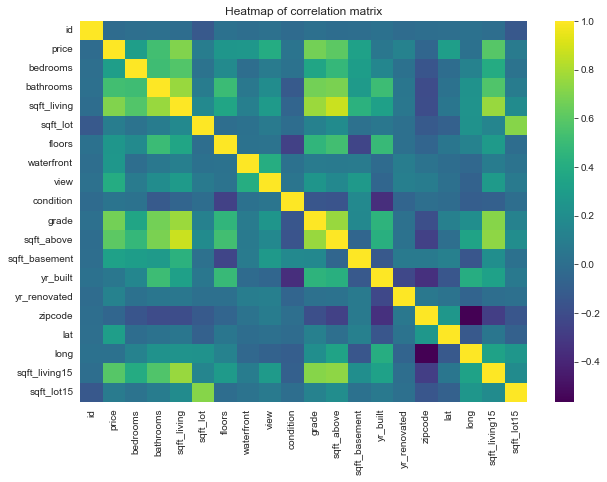

In [8]:
plt.figure(figsize = (10, 7))
sns.heatmap(df.corr(), cmap = 'viridis')
plt.title('Heatmap of correlation matrix')

In [9]:
# values correlating with our target value (Price)
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

Text(0, 0.5, 'square foot area of house')

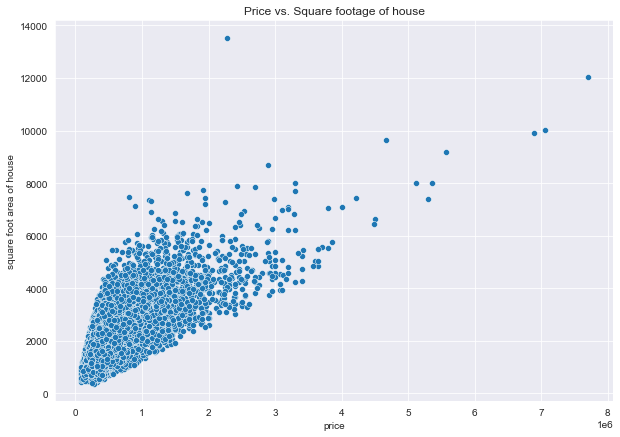

In [10]:
plt.figure(figsize = (10, 7))
sns.scatterplot(x = 'price', y = 'sqft_living', data = df)
plt.title ("Price vs. Square footage of house");
plt.ylabel('square foot area of house')

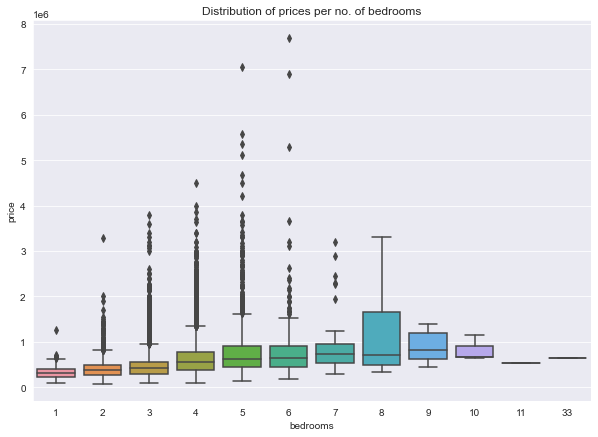

In [11]:
plt.figure(figsize = (10, 7))
sns.boxplot(x = 'bedrooms', y = 'price', data = df)
plt.title ("Distribution of prices per no. of bedrooms");
#plt.ylabel('square foot area of house')

Text(0, 0.5, 'Longitude')

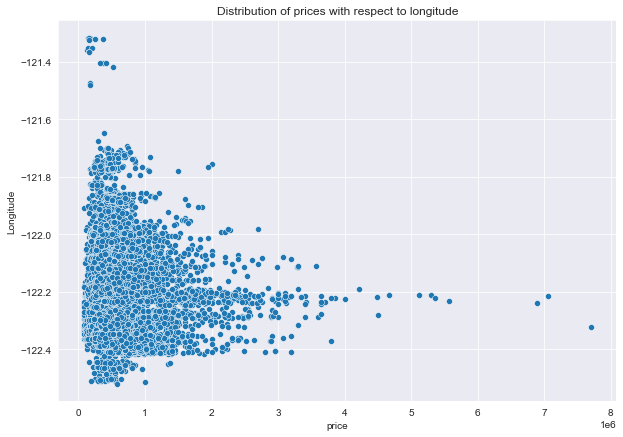

In [12]:
plt.figure(figsize = (10, 7))
sns.scatterplot(x = 'price', y = 'long', data = df)
plt.title ("Distribution of prices with respect to longitude");
plt.ylabel('Longitude')

Text(0, 0.5, 'Lattitude')

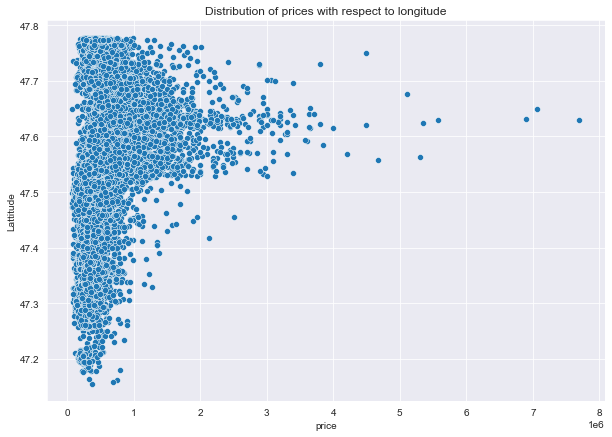

In [13]:
plt.figure(figsize = (10, 7))
sns.scatterplot(x = 'price', y = 'lat', data = df)
plt.title ("Distribution of prices with respect to longitude");
plt.ylabel('Lattitude')

<Axes: xlabel='long', ylabel='lat'>

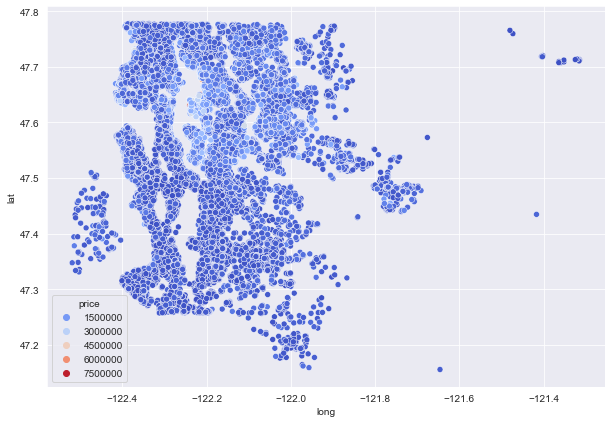

In [14]:
plt.figure(figsize = (10, 7))
sns.scatterplot(x = 'long', y = 'lat', data = df, hue = 'price', palette = 'coolwarm')

In [15]:
df.sort_values('price', ascending = False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


### Filtered dataset - We removed the outlier values

In [16]:
non_top_df = df.sort_values('price', ascending = False).iloc[round(len(df) * 0.01):]
non_top_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,824059321,6/2/2014,1970000.0,4,3.50,4370,8510,2.0,0,1,...,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12271,1923000260,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,...,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,3124059023,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
12565,2806300065,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,...,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
1150,4055701200,4/21/2015,1960000.0,4,2.75,3120,7898,1.0,1,4,...,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868


<Axes: xlabel='long', ylabel='lat'>

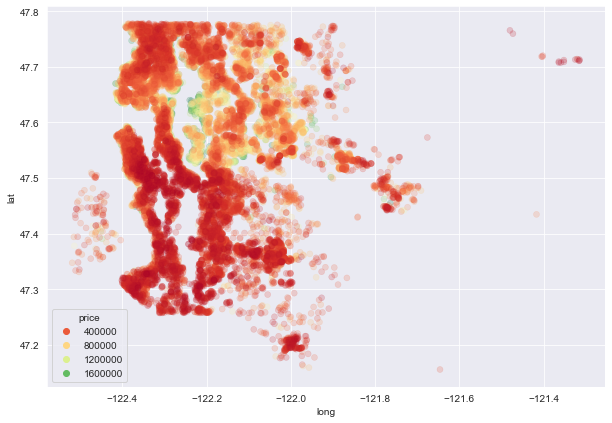

In [17]:
plt.figure(figsize = (10, 7))
sns.scatterplot(x = 'long', 
                y = 'lat', 
                data = non_top_df, 
                hue = 'price', 
                palette = 'RdYlGn',
                edgecolor = None,
                alpha = 0.2,
               )

([<matplotlib.axis.XTick at 0x215f39c5a90>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

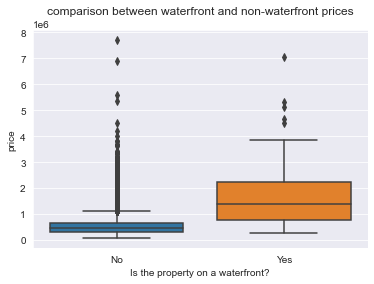

In [18]:
sns.boxplot(x = 'waterfront', y = 'price', data = df)
plt.title('comparison between waterfront and non-waterfront prices')
plt.xlabel('Is the property on a waterfront?')
plt.xticks(ticks = [0, 1], labels = ['No', 'Yes'])

([<matplotlib.axis.XTick at 0x215f565da90>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

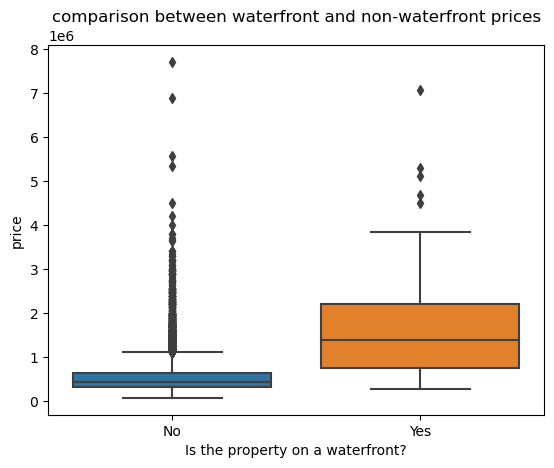

In [19]:
plt.rcdefaults()
sns.boxplot(x = 'waterfront', y = 'price', data = df)
plt.title('comparison between waterfront and non-waterfront prices')
plt.xlabel('Is the property on a waterfront?')
plt.xticks(ticks = [0, 1], labels = ['No', 'Yes'])

In [20]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Feature Engineering Section

In [21]:
df = df.drop ('id', axis = 1)

In [24]:
# explicitly typecasting date objects to datetime format
df['date'] = pd.to_datetime(df['date']);
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [27]:
# create a 'year' feature
df['year'] = df['date'].apply(lambda x: x.year)

In [29]:
# create a 'month' feature
df['month'] = df['date'].apply(lambda x: x.month)

In [30]:
# create a 'day' feature
df['day'] = df['date'].apply(lambda x: x.day)

In [31]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


<Axes: xlabel='month', ylabel='price'>

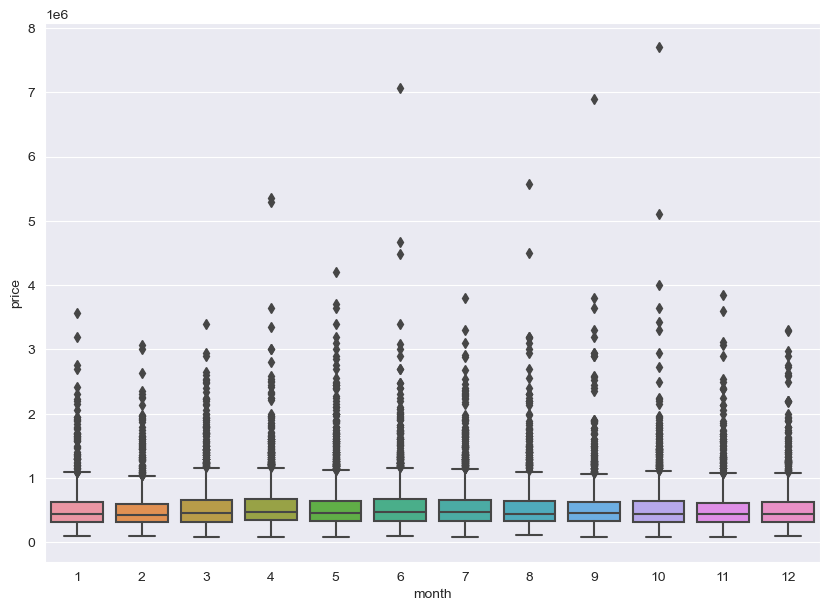

In [34]:
sns.set_style('darkgrid')
plt.figure(figsize = (10, 7))
sns.boxplot(x = 'month', y = 'price', data = df)

<Axes: xlabel='month'>

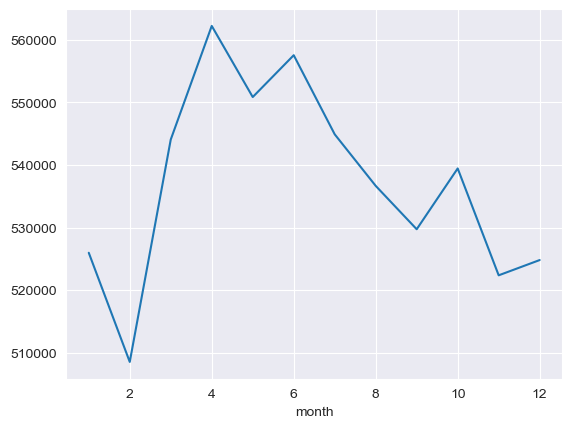

In [36]:
df.groupby('month').mean()['price'].plot()

<Axes: xlabel='year'>

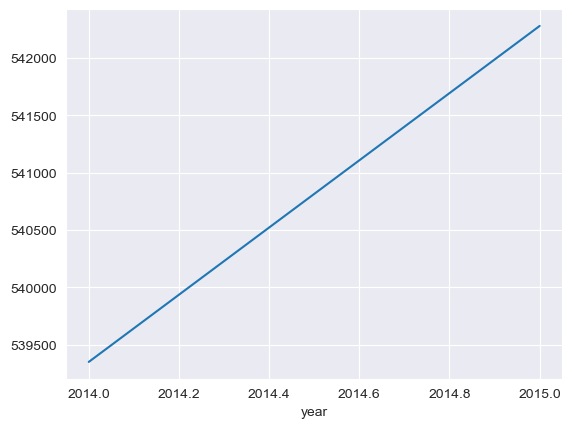

In [37]:
df.groupby('year').mean()['price'].plot()

In [39]:
# removing date column since it's redundant
df = df.drop('date', axis = 1)

In [40]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


In [41]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

<strong>Note: </strong> zipcode values are <strong>70!</strong>, i.e. too many to create dummy variables/one-hot encode! 

In [80]:
# OPTIONAL IDEA: PLOT THIS BY ZIPCODE ON GEOPLOT!
df = df.drop('zipcode', axis = 1);

In [43]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

<strong>NOTE: </strong> 0 is a signifier of 'not renovated' status here since 0 is not a logical year-renovated value

In [63]:
df.corr()['yr_renovated'].sort_values(ascending = False)

yr_renovated     1.000000
price            0.126424
view             0.103951
waterfront       0.092873
sqft_basement    0.071233
zipcode          0.064325
sqft_living      0.055308
bathrooms        0.050544
lat              0.029350
sqft_above       0.023251
bedrooms         0.018389
grade            0.014261
month            0.012864
day              0.008148
sqft_lot15       0.007944
sqft_lot         0.007686
floors           0.006427
sqft_living15   -0.002695
year            -0.023719
condition       -0.060788
long            -0.068321
yr_built        -0.224907
Name: yr_renovated, dtype: float64

We can see here that 'yr_renovated' correlates most highly with the price column. We can also see that it is ia positive correlation, therefore the more one increases, it correlates with an increase in the other. Therefore, since the yr_renovated column contains years, it is safe to assume that the more recent (higher) a year value is, the higher the price of the house will be!

In [64]:
df['sqft_basement'].value_counts()

0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

<strong>NOTE: </strong> Similar to the 'yr_renovated' values, there is a 0 signifier for 'no_basement' status

In [68]:
df.corr()['sqft_basement'].sort_values(ascending = False)

sqft_basement    1.000000
sqft_living      0.435130
price            0.323799
bedrooms         0.302808
bathrooms        0.283440
view             0.277078
sqft_living15    0.200443
condition        0.173849
grade            0.168220
lat              0.110414
waterfront       0.080559
zipcode          0.074725
yr_renovated     0.071233
sqft_lot15       0.017550
sqft_lot         0.015418
month            0.006135
day             -0.010355
year            -0.015706
sqft_above      -0.052156
yr_built        -0.133064
long            -0.144546
floors          -0.245715
Name: sqft_basement, dtype: float64

## Preprocessing + Scaling

In [109]:
# since 'price' is the target value for our model
X = df.drop('price', axis = 1).values;
y = df['price'].values;

In [110]:
from sklearn.model_selection import train_test_split;

In [111]:
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [112]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler; 

In [113]:
scaler = MinMaxScaler()

In [114]:
# Scale/Normalize
X_train_scaled = scaler.fit_transform(X_train);
X_test_scaled = scaler.fit_transform(X_test);

In [115]:
from tensorflow.keras import Sequential;
from tensorflow.keras.layers import Dense, Dropout;
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy;

In [116]:
X_train.shape[1]

20

In [117]:
# therefore, since we have 20 incoming features:
input_vec = X_train.shape[1];
dropout_ratio = 0.2;
output_vec = 1;

In [118]:
model = Sequential()

In [119]:
model.add(Dense(input_vec, activation = 'relu'))
model.add(Dense(input_vec, activation = 'relu'))
model.add(Dense(input_vec, activation = 'relu'))
model.add(Dropout(dropout_ratio))
model.add(Dense(input_vec, activation = 'relu'))
model.add(Dense(1))

In [120]:
model.compile(optimizer='adam', loss = 'mse', metrics= ['accuracy'])

In [121]:
model.fit(x = X_train_scaled, 
          y = y_train, 
          verbose = 1, 
          epochs = 500, 
          validation_data = (X_test_scaled, y_test), 
          batch_size = 128)

Epoch 1/500
127/127 [==============================] - 2s 7ms/step - loss: 432060530688.0000 - accuracy: 0.0000e+00 - val_loss: 411063353344.0000 - val_accuracy: 0.0000e+00
Epoch 2/500
127/127 [==============================] - 1s 4ms/step - loss: 428403490816.0000 - accuracy: 0.0000e+00 - val_loss: 398498824192.0000 - val_accuracy: 0.0000e+00
Epoch 3/500
127/127 [==============================] - 1s 4ms/step - loss: 376929157120.0000 - accuracy: 0.0000e+00 - val_loss: 292074487808.0000 - val_accuracy: 0.0000e+00
Epoch 4/500
127/127 [==============================] - 1s 4ms/step - loss: 207597174784.0000 - accuracy: 0.0000e+00 - val_loss: 113471856640.0000 - val_accuracy: 0.0000e+00
Epoch 5/500
127/127 [==============================] - 1s 4ms/step - loss: 114195111936.0000 - accuracy: 0.0000e+00 - val_loss: 92558786560.0000 - val_accuracy: 0.0000e+00
Epoch 6/500
127/127 [==============================] - 1s 4ms/step - loss: 111238201344.0000 - accuracy: 0.0000e+00 - val_loss: 90691903

127/127 [==============================] - 0s 4ms/step - loss: 48776028160.0000 - accuracy: 0.0000e+00 - val_loss: 40734879744.0000 - val_accuracy: 0.0000e+00
Epoch 49/500
127/127 [==============================] - 1s 4ms/step - loss: 47914569728.0000 - accuracy: 0.0000e+00 - val_loss: 40722735104.0000 - val_accuracy: 0.0000e+00
Epoch 50/500
127/127 [==============================] - 1s 4ms/step - loss: 48483241984.0000 - accuracy: 0.0000e+00 - val_loss: 39774601216.0000 - val_accuracy: 0.0000e+00
Epoch 51/500
127/127 [==============================] - 1s 4ms/step - loss: 47666085888.0000 - accuracy: 0.0000e+00 - val_loss: 38047358976.0000 - val_accuracy: 0.0000e+00
Epoch 52/500
127/127 [==============================] - 1s 4ms/step - loss: 47465873408.0000 - accuracy: 0.0000e+00 - val_loss: 39589101568.0000 - val_accuracy: 0.0000e+00
Epoch 53/500
127/127 [==============================] - 1s 4ms/step - loss: 47774199808.0000 - accuracy: 0.0000e+00 - val_loss: 38506946560.0000 - val_ac

Epoch 96/500
127/127 [==============================] - 1s 4ms/step - loss: 39474585600.0000 - accuracy: 0.0000e+00 - val_loss: 32553527296.0000 - val_accuracy: 0.0000e+00
Epoch 97/500
127/127 [==============================] - 1s 4ms/step - loss: 39895633920.0000 - accuracy: 0.0000e+00 - val_loss: 33337620480.0000 - val_accuracy: 0.0000e+00
Epoch 98/500
127/127 [==============================] - 1s 4ms/step - loss: 39392546816.0000 - accuracy: 0.0000e+00 - val_loss: 32553637888.0000 - val_accuracy: 0.0000e+00
Epoch 99/500
127/127 [==============================] - 1s 4ms/step - loss: 39428456448.0000 - accuracy: 0.0000e+00 - val_loss: 32570302464.0000 - val_accuracy: 0.0000e+00
Epoch 100/500
127/127 [==============================] - 1s 7ms/step - loss: 39363870720.0000 - accuracy: 0.0000e+00 - val_loss: 32147382272.0000 - val_accuracy: 0.0000e+00
Epoch 101/500
127/127 [==============================] - 1s 4ms/step - loss: 40016482304.0000 - accuracy: 0.0000e+00 - val_loss: 3352513945

127/127 [==============================] - 1s 4ms/step - loss: 37040881664.0000 - accuracy: 0.0000e+00 - val_loss: 31504924672.0000 - val_accuracy: 0.0000e+00
Epoch 144/500
127/127 [==============================] - 1s 4ms/step - loss: 37122777088.0000 - accuracy: 0.0000e+00 - val_loss: 31591911424.0000 - val_accuracy: 0.0000e+00
Epoch 145/500
127/127 [==============================] - 1s 4ms/step - loss: 36333268992.0000 - accuracy: 0.0000e+00 - val_loss: 31036624896.0000 - val_accuracy: 0.0000e+00
Epoch 146/500
127/127 [==============================] - 0s 4ms/step - loss: 37017817088.0000 - accuracy: 0.0000e+00 - val_loss: 31922683904.0000 - val_accuracy: 0.0000e+00
Epoch 147/500
127/127 [==============================] - 1s 5ms/step - loss: 37856067584.0000 - accuracy: 0.0000e+00 - val_loss: 30507108352.0000 - val_accuracy: 0.0000e+00
Epoch 148/500
127/127 [==============================] - 1s 6ms/step - loss: 37092466688.0000 - accuracy: 0.0000e+00 - val_loss: 32212176896.0000 - v

127/127 [==============================] - 1s 4ms/step - loss: 36144492544.0000 - accuracy: 0.0000e+00 - val_loss: 32897314816.0000 - val_accuracy: 0.0000e+00
Epoch 191/500
127/127 [==============================] - 0s 4ms/step - loss: 36112994304.0000 - accuracy: 0.0000e+00 - val_loss: 33186691072.0000 - val_accuracy: 0.0000e+00
Epoch 192/500
127/127 [==============================] - 0s 4ms/step - loss: 36117745664.0000 - accuracy: 0.0000e+00 - val_loss: 32843913216.0000 - val_accuracy: 0.0000e+00
Epoch 193/500
127/127 [==============================] - 0s 4ms/step - loss: 35752448000.0000 - accuracy: 0.0000e+00 - val_loss: 32115904512.0000 - val_accuracy: 0.0000e+00
Epoch 194/500
127/127 [==============================] - 0s 4ms/step - loss: 35667152896.0000 - accuracy: 0.0000e+00 - val_loss: 31681634304.0000 - val_accuracy: 0.0000e+00
Epoch 195/500
127/127 [==============================] - 0s 4ms/step - loss: 36163465216.0000 - accuracy: 0.0000e+00 - val_loss: 32167866368.0000 - v

127/127 [==============================] - 0s 4ms/step - loss: 34620592128.0000 - accuracy: 0.0000e+00 - val_loss: 34108680192.0000 - val_accuracy: 0.0000e+00
Epoch 238/500
127/127 [==============================] - 0s 4ms/step - loss: 33902413824.0000 - accuracy: 0.0000e+00 - val_loss: 34105657344.0000 - val_accuracy: 0.0000e+00
Epoch 239/500
127/127 [==============================] - 0s 4ms/step - loss: 34230296576.0000 - accuracy: 0.0000e+00 - val_loss: 32944402432.0000 - val_accuracy: 0.0000e+00
Epoch 240/500
127/127 [==============================] - 0s 3ms/step - loss: 35166298112.0000 - accuracy: 0.0000e+00 - val_loss: 32093396992.0000 - val_accuracy: 0.0000e+00
Epoch 241/500
127/127 [==============================] - 0s 3ms/step - loss: 34424664064.0000 - accuracy: 0.0000e+00 - val_loss: 32828563456.0000 - val_accuracy: 0.0000e+00
Epoch 242/500
127/127 [==============================] - 0s 3ms/step - loss: 34037358592.0000 - accuracy: 0.0000e+00 - val_loss: 34358032384.0000 - v

127/127 [==============================] - 1s 4ms/step - loss: 33474830336.0000 - accuracy: 0.0000e+00 - val_loss: 35494170624.0000 - val_accuracy: 0.0000e+00
Epoch 285/500
127/127 [==============================] - 0s 4ms/step - loss: 33152618496.0000 - accuracy: 0.0000e+00 - val_loss: 36479455232.0000 - val_accuracy: 0.0000e+00
Epoch 286/500
127/127 [==============================] - 1s 4ms/step - loss: 33030426624.0000 - accuracy: 0.0000e+00 - val_loss: 38773874688.0000 - val_accuracy: 0.0000e+00
Epoch 287/500
127/127 [==============================] - 0s 4ms/step - loss: 33716893696.0000 - accuracy: 0.0000e+00 - val_loss: 37285486592.0000 - val_accuracy: 0.0000e+00
Epoch 288/500
127/127 [==============================] - 0s 4ms/step - loss: 33428240384.0000 - accuracy: 0.0000e+00 - val_loss: 37497466880.0000 - val_accuracy: 0.0000e+00
Epoch 289/500
127/127 [==============================] - 0s 4ms/step - loss: 32895752192.0000 - accuracy: 0.0000e+00 - val_loss: 35541831680.0000 - v

127/127 [==============================] - 1s 4ms/step - loss: 31795955712.0000 - accuracy: 0.0000e+00 - val_loss: 38870515712.0000 - val_accuracy: 0.0000e+00
Epoch 332/500
127/127 [==============================] - 1s 4ms/step - loss: 31963969536.0000 - accuracy: 0.0000e+00 - val_loss: 39411965952.0000 - val_accuracy: 0.0000e+00
Epoch 333/500
127/127 [==============================] - 0s 4ms/step - loss: 32536188928.0000 - accuracy: 0.0000e+00 - val_loss: 40342679552.0000 - val_accuracy: 0.0000e+00
Epoch 334/500
127/127 [==============================] - 1s 4ms/step - loss: 31906490368.0000 - accuracy: 0.0000e+00 - val_loss: 38580408320.0000 - val_accuracy: 0.0000e+00
Epoch 335/500
127/127 [==============================] - 0s 4ms/step - loss: 31762599936.0000 - accuracy: 0.0000e+00 - val_loss: 39075094528.0000 - val_accuracy: 0.0000e+00
Epoch 336/500
127/127 [==============================] - 1s 4ms/step - loss: 31968835584.0000 - accuracy: 0.0000e+00 - val_loss: 40033210368.0000 - v

127/127 [==============================] - 1s 5ms/step - loss: 30527240192.0000 - accuracy: 0.0000e+00 - val_loss: 44049285120.0000 - val_accuracy: 0.0000e+00
Epoch 379/500
127/127 [==============================] - 1s 5ms/step - loss: 30907639808.0000 - accuracy: 0.0000e+00 - val_loss: 41862172672.0000 - val_accuracy: 0.0000e+00
Epoch 380/500
127/127 [==============================] - 1s 6ms/step - loss: 31466547200.0000 - accuracy: 0.0000e+00 - val_loss: 42538590208.0000 - val_accuracy: 0.0000e+00
Epoch 381/500
127/127 [==============================] - 1s 4ms/step - loss: 30947545088.0000 - accuracy: 0.0000e+00 - val_loss: 42411773952.0000 - val_accuracy: 0.0000e+00
Epoch 382/500
127/127 [==============================] - 1s 4ms/step - loss: 32093685760.0000 - accuracy: 0.0000e+00 - val_loss: 42496757760.0000 - val_accuracy: 0.0000e+00
Epoch 383/500
127/127 [==============================] - 1s 4ms/step - loss: 30526601216.0000 - accuracy: 0.0000e+00 - val_loss: 44075282432.0000 - v

127/127 [==============================] - 0s 4ms/step - loss: 30081218560.0000 - accuracy: 0.0000e+00 - val_loss: 44987883520.0000 - val_accuracy: 0.0000e+00
Epoch 426/500
127/127 [==============================] - 1s 4ms/step - loss: 30287775744.0000 - accuracy: 0.0000e+00 - val_loss: 44076212224.0000 - val_accuracy: 0.0000e+00
Epoch 427/500
127/127 [==============================] - 1s 4ms/step - loss: 29639616512.0000 - accuracy: 0.0000e+00 - val_loss: 42845683712.0000 - val_accuracy: 0.0000e+00
Epoch 428/500
127/127 [==============================] - 1s 5ms/step - loss: 30055489536.0000 - accuracy: 0.0000e+00 - val_loss: 46346067968.0000 - val_accuracy: 0.0000e+00
Epoch 429/500
127/127 [==============================] - 0s 4ms/step - loss: 29309396992.0000 - accuracy: 0.0000e+00 - val_loss: 43236937728.0000 - val_accuracy: 0.0000e+00
Epoch 430/500
127/127 [==============================] - 1s 4ms/step - loss: 29887920128.0000 - accuracy: 0.0000e+00 - val_loss: 43533225984.0000 - v

127/127 [==============================] - 1s 4ms/step - loss: 28783597568.0000 - accuracy: 0.0000e+00 - val_loss: 45669093376.0000 - val_accuracy: 0.0000e+00
Epoch 473/500
127/127 [==============================] - 0s 4ms/step - loss: 28875497472.0000 - accuracy: 0.0000e+00 - val_loss: 47501361152.0000 - val_accuracy: 0.0000e+00
Epoch 474/500
127/127 [==============================] - 1s 4ms/step - loss: 29117274112.0000 - accuracy: 0.0000e+00 - val_loss: 48793862144.0000 - val_accuracy: 0.0000e+00
Epoch 475/500
127/127 [==============================] - 1s 4ms/step - loss: 29055967232.0000 - accuracy: 0.0000e+00 - val_loss: 47415709696.0000 - val_accuracy: 0.0000e+00
Epoch 476/500
127/127 [==============================] - 1s 4ms/step - loss: 28822657024.0000 - accuracy: 0.0000e+00 - val_loss: 47552053248.0000 - val_accuracy: 0.0000e+00
Epoch 477/500
127/127 [==============================] - 1s 4ms/step - loss: 28792434688.0000 - accuracy: 0.0000e+00 - val_loss: 47602167808.0000 - v

In [122]:
model_hist_df = pd.DataFrame(model.history.history)

<Axes: >

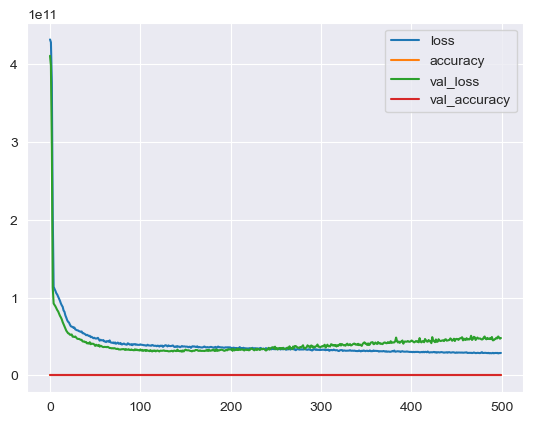

In [123]:
model_hist_df.plot()

<strong>NOTE: </strong> The above graph shows a clear diversion between the validation loss and training loss values. This is due to the model overfitting to our data set. Gonna try to resolve this problem using early stop.

## Evaluation

In [127]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, confusion_matrix;

In [126]:
y_pred = model.predict(X_test_scaled)

169/169 [==============================] - 0s 2ms/step


In [128]:
print ('MAE: ', mean_absolute_error(y_test, y_pred));
print ('MSE: ', mean_squared_error(y_test, y_pred));
print ('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)));
print ('Explained Variance Score: ', explained_variance_score(y_test, y_pred));

MAE:  144588.56961371528
MSE:  48169456752.37268
RMSE:  219475.41263743571
Explained Variance Score:  0.7584449078809549


<strong>what do these high values mean?</strong><br> We need to get the context for these values in order to properly coneptualize the metrics. Therefore, we shall try to see what % of the error value is when compared to the average values for target ('price') values in our dataset.

In [129]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

we can see the mean value is about ~540296; if we want to disregard outliers, we could go with the median value, i.e. ~450000

In [131]:
print ("Performance evaluation score for our model: \n")
print (( mean_absolute_error(y_test, y_pred) / df['price'].mean()) * 100)

Performance evaluation score for our model: 

26.76096364550092


Therefore our model has a ~27% error rate (not good!)

In [132]:
print ('Explained Variance Score: ', explained_variance_score(y_test, y_pred));

Explained Variance Score:  0.7584449078809549


As we can see, our model is capturing about ~76% of the variance in our dataset. A value of 1.0 (i.e. 100%) means it captures all the variance in our data.

Text(0, 0.5, 'Predicted Y Values')

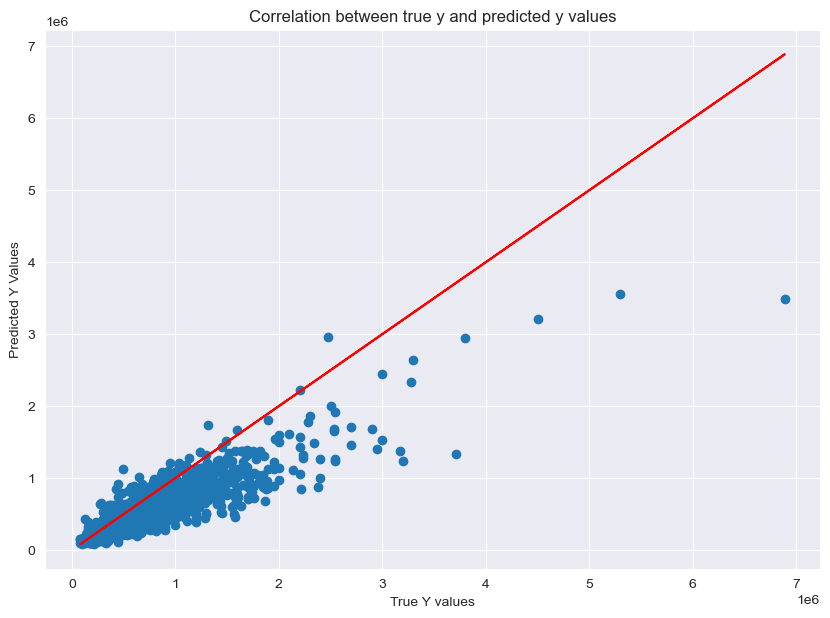

In [136]:
plt.figure (figsize= (10, 7))
plt.scatter(y_test, y_pred)
plt.plot (y_test, y_test, 'r')
plt.title('Correlation between true y and predicted y values')
plt.xlabel('True Y values')
plt.ylabel('Predicted Y Values')

As illustrated in the graph above, our model is bad at predicting the prices for the expensive houses (which are likely to be outliers as well) but is really good at predicting the values that fall within 0 and 1.5 million (1.5 * 10 ^ 6).

### let's try optimizing and training the model for the normal use-case scenarios (not the outliers; but 99% of the cases)

In [149]:
df.shape[0]

21597

In [153]:
df.corr()['price'].sort_values(ascending = False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
year             0.003727
month           -0.009928
day             -0.014684
Name: price, dtype: float64

Since values lower than +-0.1 signify a lower correlation between the values and price, let's drop those columns from our dataset [columnar feature extraction]

In [222]:
high_corr_features = df.corr()['price'].sort_values(ascending = False)[:-8].index

C:\Users\Shahbaz\AppData\Local\Temp\ipykernel_75608\444587821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

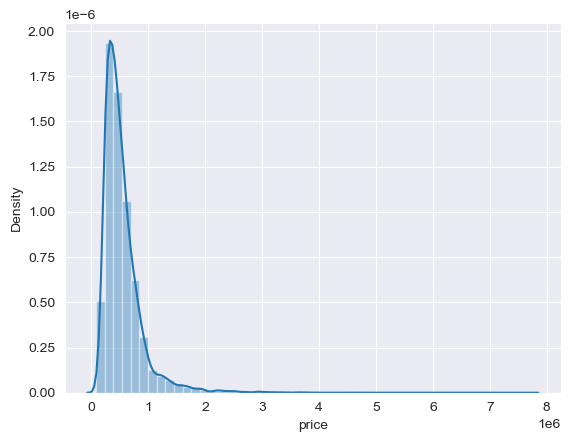

In [188]:
sns.distplot(df['price'])

let's try to see how many values we need to get rid of to fall within the 99% of price-value cases:

In [204]:
print ("99% of the dataset: ", np.round(df['price'].shape[0] * 0.99))
print ("1% of the dataset: ", np.round(df['price'].shape[0] * 0.01))

99% of the dataset:  21381.0
1% of the dataset:  216.0


therefore, we need to get rid of the top 216 price values from our dataset [row-wise selection]<br>we are only getting rid of the top values since our current model skews in the direction of higher predicted values, not lower

In [211]:
upper_price_indices = df.sort_values(by = 'price', ascending = False)[:216].index;

In [225]:
# Eliminate rows
df_99 = df.drop(upper_price_indices, axis = 0);
df_99.shape
# Eliminate Columns
df_99 = df_99[high_corr_features.values]
df_99.head()

,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,bedrooms,lat,waterfront,floors,yr_renovated
0,221900.0,1180,7,1180,1340,1.00,0,0,3,47.5112,0,1.0,0
1,538000.0,2570,7,2170,1690,2.25,0,400,3,47.7210,0,2.0,1991
2,180000.0,770,6,770,2720,1.00,0,0,2,47.7379,0,1.0,0
3,604000.0,1960,7,1050,1360,3.00,0,910,4,47.5208,0,1.0,0
4,510000.0,1680,8,1680,1800,2.00,0,0,3,47.6168,0,1.0,0


C:\Users\Shahbaz\AppData\Local\Temp\ipykernel_75608\1934124299.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_99['price'])


<Axes: xlabel='price', ylabel='Density'>

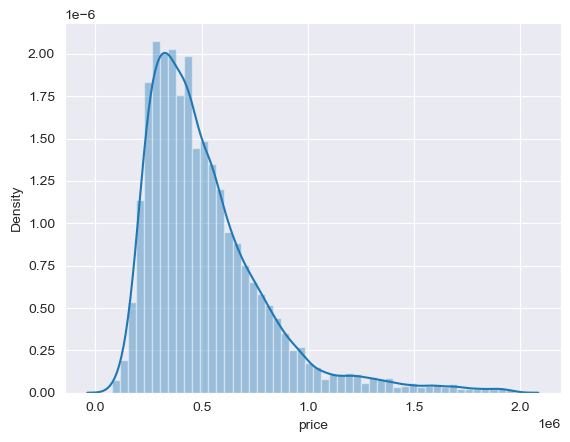

In [227]:
sns.distplot(df_99['price'])

Our graph still seems to have a bit of bias but overall it shows a really nice distribution; a substantial improvement over our raw dataset.

In [233]:
# X for 99 percent of the cases
X_99 = df_99.drop('price', axis = 1).values
y_99 = df_99['price'].values

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [235]:
scaler = MinMaxScaler();

In [236]:
#X_99_scaled = scaler.transform(X_99.values.reshape(-1, 20))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [237]:
# therefore, since we have 20 incoming features:
input_vec = X_train.shape[1];
dropout_ratio = 0.2;
output_vec = 1;

In [238]:
model_99 = Sequential();

In [239]:
model_99.add(Dense(input_vec, activation = 'relu'))
model_99.add(Dense(input_vec, activation = 'relu'))
model_99.add(Dense(input_vec, activation = 'relu'))
model_99.add(Dropout(dropout_ratio))
model_99.add(Dense(input_vec, activation = 'relu'))
model_99.add(Dense(1))

In [240]:
model_99.compile(optimizer='adam', loss = 'mse', metrics= ['accuracy'])

In [241]:
model_99.fit(x = X_train_scaled, 
          y = y_train, 
          verbose = 1, 
          epochs = 500, 
          validation_data = (X_test_scaled, y_test), 
          batch_size = 128)

Epoch 1/500
119/119 [==============================] - 1s 6ms/step - loss: 430217691136.0000 - accuracy: 0.0000e+00 - val_loss: 418778480640.0000 - val_accuracy: 0.0000e+00
Epoch 2/500
119/119 [==============================] - 1s 4ms/step - loss: 426901536768.0000 - accuracy: 0.0000e+00 - val_loss: 406905356288.0000 - val_accuracy: 0.0000e+00
Epoch 3/500
119/119 [==============================] - 0s 4ms/step - loss: 379581693952.0000 - accuracy: 0.0000e+00 - val_loss: 302431698944.0000 - val_accuracy: 0.0000e+00
Epoch 4/500
119/119 [==============================] - 0s 4ms/step - loss: 209670520832.0000 - accuracy: 0.0000e+00 - val_loss: 115238281216.0000 - val_accuracy: 0.0000e+00
Epoch 5/500
119/119 [==============================] - 1s 4ms/step - loss: 109504053248.0000 - accuracy: 0.0000e+00 - val_loss: 97706835968.0000 - val_accuracy: 0.0000e+00
Epoch 6/500
119/119 [==============================] - 0s 4ms/step - loss: 104076779520.0000 - accuracy: 0.0000e+00 - val_loss: 95398625

119/119 [==============================] - 0s 4ms/step - loss: 43715526656.0000 - accuracy: 0.0000e+00 - val_loss: 36491153408.0000 - val_accuracy: 0.0000e+00
Epoch 49/500
119/119 [==============================] - 0s 4ms/step - loss: 42710310912.0000 - accuracy: 0.0000e+00 - val_loss: 36553453568.0000 - val_accuracy: 0.0000e+00
Epoch 50/500
119/119 [==============================] - 0s 4ms/step - loss: 42560151552.0000 - accuracy: 0.0000e+00 - val_loss: 36066295808.0000 - val_accuracy: 0.0000e+00
Epoch 51/500
119/119 [==============================] - 0s 4ms/step - loss: 42653958144.0000 - accuracy: 0.0000e+00 - val_loss: 35817586688.0000 - val_accuracy: 0.0000e+00
Epoch 52/500
119/119 [==============================] - 0s 4ms/step - loss: 41997340672.0000 - accuracy: 0.0000e+00 - val_loss: 35691720704.0000 - val_accuracy: 0.0000e+00
Epoch 53/500
119/119 [==============================] - 0s 4ms/step - loss: 42314170368.0000 - accuracy: 0.0000e+00 - val_loss: 35480674304.0000 - val_ac

Epoch 96/500
119/119 [==============================] - 0s 4ms/step - loss: 38671249408.0000 - accuracy: 0.0000e+00 - val_loss: 31956056064.0000 - val_accuracy: 0.0000e+00
Epoch 97/500
119/119 [==============================] - 0s 4ms/step - loss: 38871236608.0000 - accuracy: 0.0000e+00 - val_loss: 31903651840.0000 - val_accuracy: 0.0000e+00
Epoch 98/500
119/119 [==============================] - 0s 4ms/step - loss: 39021731840.0000 - accuracy: 0.0000e+00 - val_loss: 31870674944.0000 - val_accuracy: 0.0000e+00
Epoch 99/500
119/119 [==============================] - 0s 4ms/step - loss: 38868971520.0000 - accuracy: 0.0000e+00 - val_loss: 31831748608.0000 - val_accuracy: 0.0000e+00
Epoch 100/500
119/119 [==============================] - 0s 4ms/step - loss: 38834274304.0000 - accuracy: 0.0000e+00 - val_loss: 31792029696.0000 - val_accuracy: 0.0000e+00
Epoch 101/500
119/119 [==============================] - 0s 4ms/step - loss: 38930182144.0000 - accuracy: 0.0000e+00 - val_loss: 3181397196

119/119 [==============================] - 0s 4ms/step - loss: 37258653696.0000 - accuracy: 0.0000e+00 - val_loss: 30387574784.0000 - val_accuracy: 0.0000e+00
Epoch 144/500
119/119 [==============================] - 1s 4ms/step - loss: 37072003072.0000 - accuracy: 0.0000e+00 - val_loss: 30548944896.0000 - val_accuracy: 0.0000e+00
Epoch 145/500
119/119 [==============================] - 1s 4ms/step - loss: 38100852736.0000 - accuracy: 0.0000e+00 - val_loss: 30388535296.0000 - val_accuracy: 0.0000e+00
Epoch 146/500
119/119 [==============================] - 0s 4ms/step - loss: 37442424832.0000 - accuracy: 0.0000e+00 - val_loss: 30314254336.0000 - val_accuracy: 0.0000e+00
Epoch 147/500
119/119 [==============================] - 1s 4ms/step - loss: 38177894400.0000 - accuracy: 0.0000e+00 - val_loss: 30308433920.0000 - val_accuracy: 0.0000e+00
Epoch 148/500
119/119 [==============================] - 0s 4ms/step - loss: 36804198400.0000 - accuracy: 0.0000e+00 - val_loss: 30285053952.0000 - v

119/119 [==============================] - 0s 4ms/step - loss: 36017209344.0000 - accuracy: 0.0000e+00 - val_loss: 29391005696.0000 - val_accuracy: 0.0000e+00
Epoch 191/500
119/119 [==============================] - 0s 4ms/step - loss: 37087182848.0000 - accuracy: 0.0000e+00 - val_loss: 29362382848.0000 - val_accuracy: 0.0000e+00
Epoch 192/500
119/119 [==============================] - 0s 4ms/step - loss: 37263601664.0000 - accuracy: 0.0000e+00 - val_loss: 29406855168.0000 - val_accuracy: 0.0000e+00
Epoch 193/500
119/119 [==============================] - 0s 4ms/step - loss: 35948216320.0000 - accuracy: 0.0000e+00 - val_loss: 29413535744.0000 - val_accuracy: 0.0000e+00
Epoch 194/500
119/119 [==============================] - 0s 4ms/step - loss: 36795990016.0000 - accuracy: 0.0000e+00 - val_loss: 29309638656.0000 - val_accuracy: 0.0000e+00
Epoch 195/500
119/119 [==============================] - 0s 4ms/step - loss: 36571176960.0000 - accuracy: 0.0000e+00 - val_loss: 29328818176.0000 - v

119/119 [==============================] - 1s 4ms/step - loss: 36355432448.0000 - accuracy: 0.0000e+00 - val_loss: 28809068544.0000 - val_accuracy: 0.0000e+00
Epoch 238/500
119/119 [==============================] - 0s 4ms/step - loss: 36340940800.0000 - accuracy: 0.0000e+00 - val_loss: 28710785024.0000 - val_accuracy: 0.0000e+00
Epoch 239/500
119/119 [==============================] - 0s 4ms/step - loss: 36317437952.0000 - accuracy: 0.0000e+00 - val_loss: 28668585984.0000 - val_accuracy: 0.0000e+00
Epoch 240/500
119/119 [==============================] - 0s 4ms/step - loss: 35913211904.0000 - accuracy: 0.0000e+00 - val_loss: 28693264384.0000 - val_accuracy: 0.0000e+00
Epoch 241/500
119/119 [==============================] - 0s 4ms/step - loss: 36231741440.0000 - accuracy: 0.0000e+00 - val_loss: 28637462528.0000 - val_accuracy: 0.0000e+00
Epoch 242/500
119/119 [==============================] - 0s 4ms/step - loss: 36109004800.0000 - accuracy: 0.0000e+00 - val_loss: 28625053696.0000 - v

119/119 [==============================] - 0s 4ms/step - loss: 35447685120.0000 - accuracy: 0.0000e+00 - val_loss: 28259940352.0000 - val_accuracy: 0.0000e+00
Epoch 285/500
119/119 [==============================] - 0s 4ms/step - loss: 35301408768.0000 - accuracy: 0.0000e+00 - val_loss: 28169316352.0000 - val_accuracy: 0.0000e+00
Epoch 286/500
119/119 [==============================] - 0s 4ms/step - loss: 35846320128.0000 - accuracy: 0.0000e+00 - val_loss: 28141408256.0000 - val_accuracy: 0.0000e+00
Epoch 287/500
119/119 [==============================] - 0s 4ms/step - loss: 36224712704.0000 - accuracy: 0.0000e+00 - val_loss: 28130361344.0000 - val_accuracy: 0.0000e+00
Epoch 288/500
119/119 [==============================] - 0s 4ms/step - loss: 35683090432.0000 - accuracy: 0.0000e+00 - val_loss: 28179027968.0000 - val_accuracy: 0.0000e+00
Epoch 289/500
119/119 [==============================] - 0s 4ms/step - loss: 35469922304.0000 - accuracy: 0.0000e+00 - val_loss: 28089731072.0000 - v

119/119 [==============================] - 0s 4ms/step - loss: 36007788544.0000 - accuracy: 0.0000e+00 - val_loss: 27788840960.0000 - val_accuracy: 0.0000e+00
Epoch 332/500
119/119 [==============================] - 0s 4ms/step - loss: 35785367552.0000 - accuracy: 0.0000e+00 - val_loss: 27706368000.0000 - val_accuracy: 0.0000e+00
Epoch 333/500
119/119 [==============================] - 0s 4ms/step - loss: 35770699776.0000 - accuracy: 0.0000e+00 - val_loss: 27601135616.0000 - val_accuracy: 0.0000e+00
Epoch 334/500
119/119 [==============================] - 0s 4ms/step - loss: 35277627392.0000 - accuracy: 0.0000e+00 - val_loss: 27681538048.0000 - val_accuracy: 0.0000e+00
Epoch 335/500
119/119 [==============================] - 0s 4ms/step - loss: 34729070592.0000 - accuracy: 0.0000e+00 - val_loss: 27663650816.0000 - val_accuracy: 0.0000e+00
Epoch 336/500
119/119 [==============================] - 0s 4ms/step - loss: 35342491648.0000 - accuracy: 0.0000e+00 - val_loss: 27601459200.0000 - v

119/119 [==============================] - 0s 4ms/step - loss: 34633981952.0000 - accuracy: 0.0000e+00 - val_loss: 27262111744.0000 - val_accuracy: 0.0000e+00
Epoch 379/500
119/119 [==============================] - 0s 4ms/step - loss: 34352578560.0000 - accuracy: 0.0000e+00 - val_loss: 27102400512.0000 - val_accuracy: 0.0000e+00
Epoch 380/500
119/119 [==============================] - 0s 4ms/step - loss: 34579980288.0000 - accuracy: 0.0000e+00 - val_loss: 27208067072.0000 - val_accuracy: 0.0000e+00
Epoch 381/500
119/119 [==============================] - 0s 4ms/step - loss: 34816348160.0000 - accuracy: 0.0000e+00 - val_loss: 27148060672.0000 - val_accuracy: 0.0000e+00
Epoch 382/500
119/119 [==============================] - 0s 4ms/step - loss: 35335475200.0000 - accuracy: 0.0000e+00 - val_loss: 27139657728.0000 - val_accuracy: 0.0000e+00
Epoch 383/500
119/119 [==============================] - 0s 4ms/step - loss: 36201369600.0000 - accuracy: 0.0000e+00 - val_loss: 27126974464.0000 - v

119/119 [==============================] - 0s 4ms/step - loss: 34700345344.0000 - accuracy: 0.0000e+00 - val_loss: 26582908928.0000 - val_accuracy: 0.0000e+00
Epoch 426/500
119/119 [==============================] - 0s 4ms/step - loss: 34565177344.0000 - accuracy: 0.0000e+00 - val_loss: 26553204736.0000 - val_accuracy: 0.0000e+00
Epoch 427/500
119/119 [==============================] - 0s 4ms/step - loss: 34388094976.0000 - accuracy: 0.0000e+00 - val_loss: 26533726208.0000 - val_accuracy: 0.0000e+00
Epoch 428/500
119/119 [==============================] - 0s 4ms/step - loss: 34654560256.0000 - accuracy: 0.0000e+00 - val_loss: 26625744896.0000 - val_accuracy: 0.0000e+00
Epoch 429/500
119/119 [==============================] - 0s 4ms/step - loss: 34876477440.0000 - accuracy: 0.0000e+00 - val_loss: 26575048704.0000 - val_accuracy: 0.0000e+00
Epoch 430/500
119/119 [==============================] - 0s 4ms/step - loss: 35625873408.0000 - accuracy: 0.0000e+00 - val_loss: 26448441344.0000 - v

119/119 [==============================] - 0s 4ms/step - loss: 34326456320.0000 - accuracy: 0.0000e+00 - val_loss: 25971656704.0000 - val_accuracy: 0.0000e+00
Epoch 473/500
119/119 [==============================] - 0s 4ms/step - loss: 33454934016.0000 - accuracy: 0.0000e+00 - val_loss: 26025009152.0000 - val_accuracy: 0.0000e+00
Epoch 474/500
119/119 [==============================] - 0s 4ms/step - loss: 34407657472.0000 - accuracy: 0.0000e+00 - val_loss: 26005798912.0000 - val_accuracy: 0.0000e+00
Epoch 475/500
119/119 [==============================] - 0s 4ms/step - loss: 34457882624.0000 - accuracy: 0.0000e+00 - val_loss: 26011201536.0000 - val_accuracy: 0.0000e+00
Epoch 476/500
119/119 [==============================] - 0s 4ms/step - loss: 34217107456.0000 - accuracy: 0.0000e+00 - val_loss: 25979502592.0000 - val_accuracy: 0.0000e+00
Epoch 477/500
119/119 [==============================] - 0s 4ms/step - loss: 34282975232.0000 - accuracy: 0.0000e+00 - val_loss: 26042343424.0000 - v

In [242]:
model_99_hist_df = pd.DataFrame(model_99.history.history);
model_99_hist_df.plot

### Model_99 Evaluation

In [243]:
y_pred = model_99.predict(X_test_scaled);

203/203 [==============================] - 0s 2ms/step


In [244]:
print ('MAE: ', mean_absolute_error(y_test, y_pred));
print ('MSE: ', mean_squared_error(y_test, y_pred));
print ('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)));
print ('Explained Variance Score: ', explained_variance_score(y_test, y_pred));

MAE:  99213.53475236303
MSE:  25739813883.403378
RMSE:  160436.32345389674
Explained Variance Score:  0.8059801290600958


In [245]:
print ("Performance evaluation score for our model: \n")
print (( mean_absolute_error(y_test, y_pred) / df['price'].mean()) * 100)

Performance evaluation score for our model: 

18.36279177353296


That is a very good improvement over our previous model's score!

In [253]:
X_old = df.iloc[upper_price_indices].drop('price', axis = 1)
X_old_scaled = scaler.transform(X_old)
y_old = df.iloc[upper_price_indices]['price']
y_pred_old = model_99.predict(X_old_scaled);

7/7 [==============================] - 0s 3ms/step


C:\Users\Shahbaz\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [254]:
print ('MAE: ', mean_absolute_error(y_old, y_pred_old));
print ('MSE: ', mean_squared_error(y_old, y_pred_old));
print ('RMSE: ', np.sqrt(mean_squared_error(y_old, y_pred_old)));
print ('Explained Variance Score: ', explained_variance_score(y_old, y_pred_old));

MAE:  670543.3640046297
MSE:  625147234619.645
RMSE:  790662.5289082853
Explained Variance Score:  0.5407412041574482


The model is not very good for the outlier values we eliminated from our dataset. This is expected as we didn't use or even consider these cases for our model. They are not our normal scenarious and since there are so few of them, they would need more data values to even qualify for building a model just for cases like these. 